In [ ]:
import gzip

with gzip.open('archive.gz', 'rb') as f_in:
    with open('outputfile', 'wb') as f_out:
        f_out.write(f_in.read())


In [ ]:
#count number of values for each label

filename = 'archive/nabirds/nabirds/image_class_labels.txt'  # Replace with the actual filename

line_count = 0
value_counts = {}

with open(filename, 'r') as file:
    for line in file:
        line_count += 1
        _, value = line.strip().split()
        if value not in value_counts:
            value_counts[value] = 1
        else:
            value_counts[value] += 1

print(f"Number of lines: {line_count}")
print("Value counts:")
for value, count in value_counts.items():
    print(f"{value}: {count}")


In [ ]:
import os
import shutil

source_folder = "archive/nabirds/nabirds/images"
destination_folder = "nabirds_images"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through all folders within the parent folder
for folder_name, subfolders, filenames in os.walk(source_folder):
    for filename in filenames:
        if filename.endswith(".jpg"):
            source_path = os.path.join(folder_name, filename)
            destination_path = os.path.join(destination_folder, filename)
            shutil.move(source_path, destination_path)


In [1]:
import os

input_file = "archive/nabirds/nabirds/bounding_boxes.txt"
output_folder = "nabirds_labels_2"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

with open(input_file, "r") as file:
    for line in file:
        line = line.strip().split(" ")
        filename = line[0].replace("-", "")
        content = " ".join(line)

        # Create a new text file with the line content
        output_file = os.path.join(output_folder, f"{filename}.txt")
        with open(output_file, "w") as outfile:
            outfile.write(content)


In [17]:
from PIL import Image

image_folder = 'nabirds_images'
annotation_folder = 'nabirds_labels_2_test'

# Iterate through each txt file in the annotations folder
for filename in os.listdir(annotation_folder):
    if filename.endswith('.txt'):
        annotation_path = os.path.join(annotation_folder, filename)
        image_path = os.path.join(image_folder, filename[:-4] + '.jpg')

        # Read the dimensions of the associated image
        with Image.open(image_path) as img:
            image_width, image_height = img.size

        # Read the contents of the annotation file
        with open(annotation_path, 'r') as file:
            contents = file.read().strip().split(' ')

        # Convert the last four fields to percentage values
        center_x, center_y, width, height = map(int, contents[-4:])
        center_x_percent = (center_x / image_width) * 100
        center_y_percent = (center_y / image_height) * 100
        width_percent = (width / image_width) * 100
        height_percent = (height / image_height) * 100

        # Update the contents of the annotation file
        contents[-4:] = [str(center_x_percent), str(center_y_percent), str(width_percent), str(height_percent)]
        updated_contents = ' '.join(contents)

        # Write the updated contents back to the annotation file
        with open(annotation_path, 'w') as file:
            file.write(updated_contents)

print("Processing completed!")


Processing completed!


In [18]:
# Iterate through each txt file in the annotations folder
for filename in os.listdir(annotation_folder):
    if filename.endswith('.txt'):
        annotation_path = os.path.join(annotation_folder, filename)

        # Read the contents of the annotation file
        with open(annotation_path, 'r') as file:
            contents = file.read().strip().split(' ')

        # Convert the last four fields to ratio format
        center_x_percent, center_y_percent, width_percent, height_percent = map(float, contents[-4:])
        center_x_ratio = center_x_percent / 100
        center_y_ratio = center_y_percent / 100
        width_ratio = width_percent / 100
        height_ratio = height_percent / 100

        # Update the contents of the annotation file
        contents[-4:] = [str(center_x_ratio), str(center_y_ratio), str(width_ratio), str(height_ratio)]
        updated_contents = ' '.join(contents)

        # Write the updated contents back to the annotation file
        with open(annotation_path, 'w') as file:
            file.write(updated_contents)

print("Processing completed!")

Processing completed!


In [15]:
import os

# Define the paths to the folders and files
folder1_path = 'nabirds_labels_2_test'
folder2_file_path = 'archive/nabirds/nabirds/image_class_labels.txt'

# Read the contents of the second file into a dictionary
id_mapping = {}
with open(folder2_file_path, 'r') as file:
    for line in file:
        id_, class_ = line.strip().split()
        id_mapping[id_] = class_

# Iterate through the files in the first folder
for filename in os.listdir(folder1_path):
    file_path = os.path.join(folder1_path, filename)

    # Read the contents of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Modify the lines and add the ID column
    modified_lines = []
    for line in lines:
        id_, *values = line.strip().split()
        class_ = id_mapping.get(id_, 'N/A')
        modified_line = f"{id_} {class_} {' '.join(values)}"
        modified_lines.append(modified_line)

    # Write the modified lines back to the file
    with open(file_path, 'w') as file:
        file.write('\n'.join(modified_lines))

print("Processing completed!")


Processing completed!


In [16]:
import os

# Define the path to the folder
folder_path = 'nabirds_labels_2_test'

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Read the contents of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Remove the ID column from each line
    modified_lines = [line.split(' ', 1)[1] for line in lines]

    # Write the modified lines back to the file
    with open(file_path, 'w') as file:
        file.write(''.join(modified_lines))

print("Processing completed!")


Processing completed!


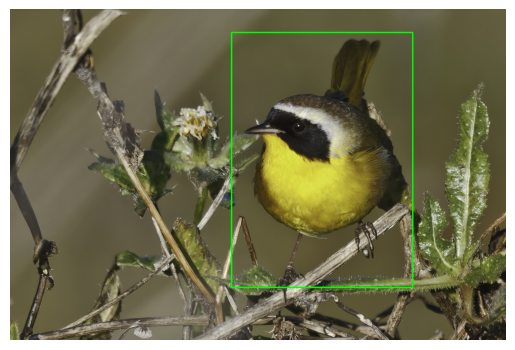

In [8]:
import os

folder_path = "path/to/your/folder"  # Update with the actual folder path

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            lines = file.readlines()

        updated_lines = []
        for line in lines:
            parts = line.strip().split(" ")
            x, y, w, h = map(int, parts[1:])
            center_x = x + w // 2
            center_y = y + h // 2
            updated_line = f"{parts[0]} {center_x} {center_y}\n"
            updated_lines.append(updated_line)

        with open(file_path, "w") as file:
            file.writelines(updated_lines)

print("Coordinates updated successfully!")


In [14]:
import os

folder_path = "nabirds_labels_2_test"  # Update with the actual folder path

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            lines = file.readlines()

        updated_lines = []
        for line in lines:
            parts = line.strip().split(" ")
            x, y, w, h = map(int, parts[1:])
            center_x = x + w // 2
            center_y = y + h // 2
            updated_line = f"{parts[0]} {center_x} {center_y} {w} {h}\n"
            updated_lines.append(updated_line)

        with open(file_path, "w") as file:
            file.writelines(updated_lines)

print("Coordinates updated successfully!")


Coordinates updated successfully!
